In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# An example of how to get raw data from a line from yt

Yt's tools are ok for quick look but don't seem very well suited to manipulating raw data, or comparison to analytical functions, etc etc.

### Loading the data and using yt's LinePlot 

yt : [INFO     ] 2019-06-12 13:21:43,424 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-06-12 13:21:43,426 Parameters: domain_dimensions         = [64 64  1]
yt : [INFO     ] 2019-06-12 13:21:43,426 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-06-12 13:21:43,427 Parameters: domain_right_edge         = [1.e+09 1.e+09 1.e+00]



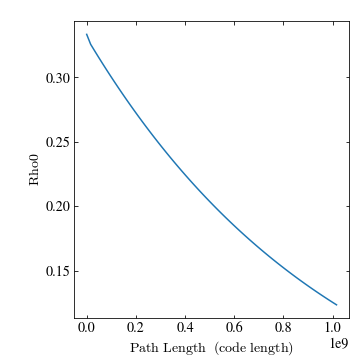

In [2]:
import yt
ds = yt.load("../single_level/plt0000000/") # I'd love a way to make this quiet
var = "rho0"
plot = yt.LinePlot(ds,var,[0.,0.,0],[0.,1e9,0],64)
plot.set_log(var, False)

### Use a method from the lineplot module to extract the data sampled along that line

This seems to be a quick way to get (non-raw) line data


yt : [INFO     ] 2019-06-12 13:21:43,810 Making a line buffer with 64 points of rho0


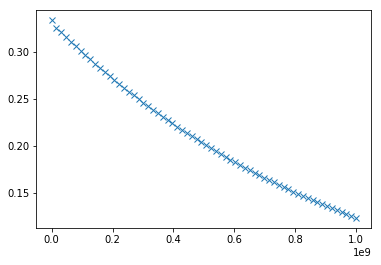

In [3]:
n = 64 # this need not be the actual number of points  - just number of sample points along the line

test = yt.LineBuffer(ds,[0.,0.,0],[0.,1e9,0],n)
linedata = test['rho0'].value
y = np.linspace(0, 9.999e8, n)
fig = plt.figure()
ax = plt.axes()
ax.plot(y, linedata, 'x')


### Using `find_field_values_at_point` to get the raw data

https://yt-project.org/doc/examining/low_level_inspection.html#finding-data-at-fixed-points

This makes a list of coordinates and returns the raw data at those coordinates.

Its pretty opaque to me whether any interpolation has taken place or if it is 'pixellated'

I kind of just want rho0 at each cell center on my UG



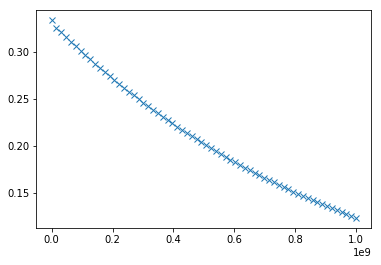

In [4]:


coords = []
y = np.linspace(0, 9.999e8, 64) # Cant use 1e9 or it will complain about OOB. Yt's use of coordinates in this case is annoying to me
for yy in y:
    coords.append((0.,yy,0.))
    
linedata = ds.find_field_values_at_points('rho0', coords)
fig = plt.figure()
ax = plt.axes()
ax.plot(y, linedata.value, 'x')


### Sampling the raw data as a '3D' array

This assumes the loaded dataset is 64x64x1

In [5]:
all_data_level_0 = ds.covering_grid(level=0, left_edge=[0,0.0,0.0],
                                      dims=[64, 64, 1])

In [6]:
print(all_data_level_0['rho0'].shape)

(64, 64, 1)


In [7]:
#print(all_data_level_0['rho0'].value)

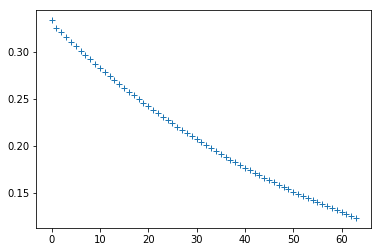

In [8]:
fig = plt.figure()
ax = plt.axes()
ax.plot(all_data_level_0['rho0'].value[0,:,0],'+')

Note there doesnt seem to be any interpolation, note what happens if you change the dims to be more or less than the actual value